## Importing Neccesary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.metrics import accuracy_score
from sklearn import metrics
warnings.filterwarnings('ignore')

# Resume

This notebook consists of gathering all the data created from the 2 following scripts:

- Fifa 23 DataPreparation
- EDA & training set

Also, here we will proceed with the creation of the Machine Learning Model we will use on our FIFA World Cup Predictions.


In [2]:
# This file comes from the "Int Matches and EDA prep" python script.
data = pd.read_csv('datos/training_set.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_fifapoints,Team2_fifapoints,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bahrain,Qatar,101,88,325,364,2,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
1,Bulgaria,England,51,4,585,1176,0,80.0,83.0,71.0,74.0,74.0,84.0,81.0,86.0
2,Canada,St. Lucia,102,184,319,54,1,77.0,65.0,68.0,70.0,76.0,65.0,65.0,65.0
3,Cyprus,Portugal,76,8,426,1059,0,64.0,81.0,67.0,70.0,66.0,82.0,86.0,82.0
4,Ecuador,Jamaica,66,43,491,622,1,69.0,63.0,70.0,75.0,77.0,65.0,72.0,72.0


In [3]:
data['team1_code'] = data['Team1'].astype('category').cat.codes
data['opp_code'] = data['Team2'].astype('category').cat.codes

In [4]:
data.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_fifapoints,Team2_fifapoints,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield,team1_code,opp_code
0,Bahrain,Qatar,101,88,325,364,2,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,12,137
1,Bulgaria,England,51,4,585,1176,0,80.0,83.0,71.0,74.0,74.0,84.0,81.0,86.0,25,51
2,Canada,St. Lucia,102,184,319,54,1,77.0,65.0,68.0,70.0,76.0,65.0,65.0,65.0,31,156
3,Cyprus,Portugal,76,8,426,1059,0,64.0,81.0,67.0,70.0,66.0,82.0,86.0,82.0,45,135
4,Ecuador,Jamaica,66,43,491,622,1,69.0,63.0,70.0,75.0,77.0,65.0,72.0,72.0,51,83


In [5]:
data.shape

(3558, 17)

In [6]:
data.dtypes

Team1                      object
Team2                      object
Team1_FIFA_RANK             int64
Team2_FIFA_RANK             int64
Team1_fifapoints            int64
Team2_fifapoints            int64
Team1_Result                int64
Team1_Goalkeeper_Score    float64
Team2_Goalkeeper_Score    float64
Team1_Defense             float64
Team1_Offense             float64
Team1_Midfield            float64
Team2_Defense             float64
Team2_Offense             float64
Team2_Midfield            float64
team1_code                  int16
opp_code                    int16
dtype: object

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split = 10, random_state=1)

In [9]:
train = data.head(3000)
test = data.tail(558)
print(train.shape)
print(test.shape)

(3000, 17)
(558, 17)


In [10]:
predictors = ['team1_code', 'opp_code',
              'Team1_fifapoints', 'Team2_fifapoints',
              'Team1_Goalkeeper_Score', 'Team2_Goalkeeper_Score', 
              'Team1_FIFA_RANK', 'Team2_FIFA_RANK', 
              'Team1_Defense', 'Team1_Offense', 'Team1_Midfield',
              'Team2_Defense', 'Team2_Offense', 'Team2_Midfield']

In [11]:
rf.fit(train[predictors], train['Team1_Result'])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [12]:
preds = rf.predict(test[predictors])

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
acc = accuracy_score(test['Team1_Result'], preds)

In [15]:
acc

0.6218637992831542

In [16]:
combined = pd.DataFrame(dict(actual=test['Team1_Result'], prediction=preds))

In [17]:
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1,2
actual,,,
0,93,38,17
1,24,246,23
2,48,61,8


#### Here we will begin a process but only considering wins and losses. 

- Draws will be considered as losses. 
- We will make this since it seems there are many issues with the draws recognition as we see above (Labeled as 2)
- By this way, model should work on a simpler way.

In [18]:
data_m = data

In [19]:
data_m = data_m.drop(['team1_code', 'opp_code'], axis=1)

In [20]:
predictors = ['Team1_fifapoints', 'Team2_fifapoints',
              'Team1_Goalkeeper_Score', 'Team2_Goalkeeper_Score', 
              'Team1_FIFA_RANK', 'Team2_FIFA_RANK', 
              'Team1_Defense', 'Team1_Offense', 'Team1_Midfield',
              'Team2_Defense', 'Team2_Offense', 'Team2_Midfield']

In [21]:
data_m['Team1_Result'] = data_m['Team1_Result'].replace(2, 0)

In [22]:
data_m.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_fifapoints,Team2_fifapoints,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bahrain,Qatar,101,88,325,364,0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
1,Bulgaria,England,51,4,585,1176,0,80.0,83.0,71.0,74.0,74.0,84.0,81.0,86.0
2,Canada,St. Lucia,102,184,319,54,1,77.0,65.0,68.0,70.0,76.0,65.0,65.0,65.0
3,Cyprus,Portugal,76,8,426,1059,0,64.0,81.0,67.0,70.0,66.0,82.0,86.0,82.0
4,Ecuador,Jamaica,66,43,491,622,1,69.0,63.0,70.0,75.0,77.0,65.0,72.0,72.0


In [23]:
train = data_m.head(3000)
test = data_m.tail(558)
print(train.shape)
print(test.shape)

(3000, 15)
(558, 15)


In [24]:
rf.fit(train[predictors], train['Team1_Result'])
preds = rf.predict(test[predictors])
acc = accuracy_score(test['Team1_Result'], preds)
acc

0.7293906810035843

In [25]:
combined = pd.DataFrame(dict(actual=test['Team1_Result'], prediction=preds))
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1
actual,,
0,192,73
1,78,215


#### We can clearly see a huge improvement on our model. We now have an accuracy on 0.75 

In [26]:
from sklearn.metrics import precision_score

In [27]:
precision_score(test['Team1_Result'], preds)

0.7465277777777778

Precision means that when we predicted wins, the team actually won 76 % of the time

In [28]:
data = data.drop(['Team1_fifapoints', 'Team2_fifapoints'],axis=1)

In [29]:
data['Team1_Result'] = data['Team1_Result'].replace(2, 0)

In [30]:
pipe_DF = data

In [31]:
data = pd.get_dummies(data)

In [32]:
X = data.drop('Team1_Result',axis=1)
y = data['Team1_Result']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

## Random Forest

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       200
           1       0.68      0.70      0.69       156

    accuracy                           0.72       356
   macro avg       0.72      0.72      0.72       356
weighted avg       0.73      0.72      0.73       356



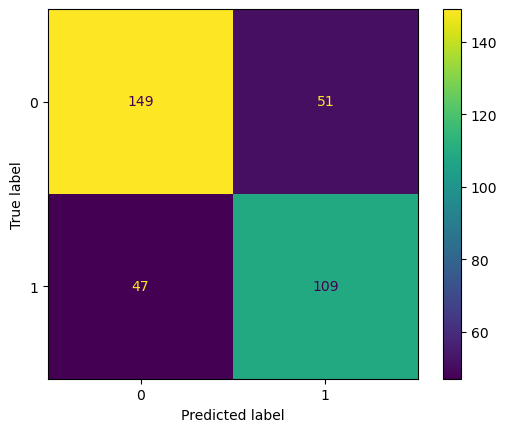

In [36]:
metrics_display(RandomForestClassifier())

## AdaBoost Classifier

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       200
           1       0.62      0.71      0.66       156

    accuracy                           0.69       356
   macro avg       0.69      0.69      0.68       356
weighted avg       0.69      0.69      0.69       356



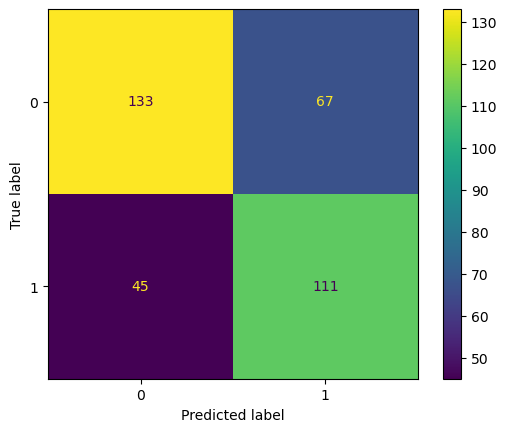

In [37]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

## XGB Boost

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       200
           1       0.64      0.66      0.65       156

    accuracy                           0.69       356
   macro avg       0.68      0.69      0.68       356
weighted avg       0.69      0.69      0.69       356



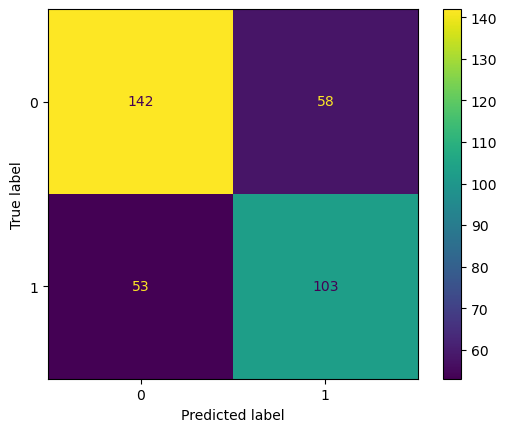

In [38]:
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

## Neural Network

In [39]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input
X_train.shape

(3202, 380)

Epoch 1/20
81/81 [==============================] - 1s 5ms/step - loss: 0.7047 - accuracy: 0.6166 - val_loss: 0.5971 - val_accuracy: 0.6802
Epoch 2/20
81/81 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.7142 - val_loss: 0.5910 - val_accuracy: 0.6771
Epoch 3/20
81/81 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7380 - val_loss: 0.6004 - val_accuracy: 0.6661
Epoch 4/20
81/81 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.7520 - val_loss: 0.6454 - val_accuracy: 0.6755
Epoch 5/20
81/81 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.7700 - val_loss: 0.6142 - val_accuracy: 0.6849
Epoch 6/20
81/81 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7724 - val_loss: 0.6579 - val_accuracy: 0.6677
Epoch 7/20
81/81 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.7763 - val_loss: 0.7033 - val_accuracy: 0.6895
Epoch 8/20
81/81 [==

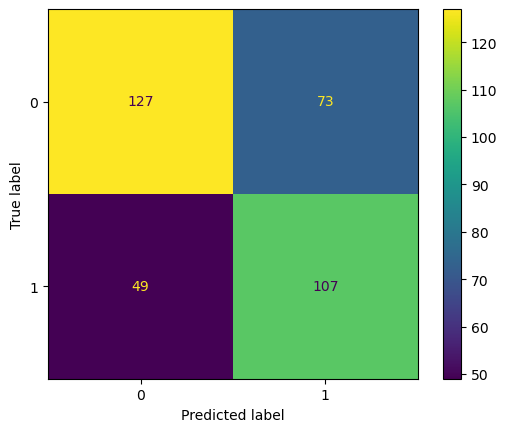

In [40]:
model = Sequential()
model.add(Input(shape=(380,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
neural = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)


From all models showed above, the best one seems to be either Random Forest or Neural Network. We will try some hyperparameters and evaluate the performance based on the validation dataset for both.

In [41]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()


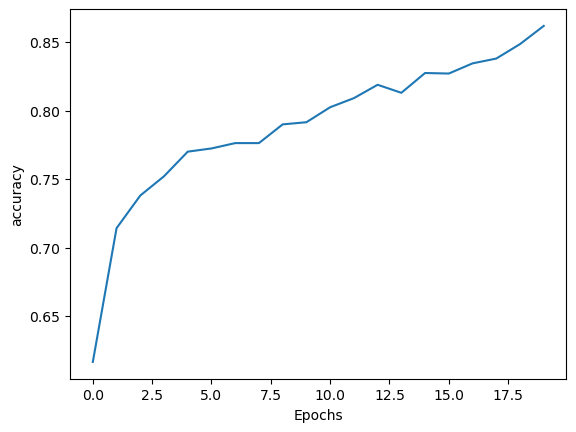

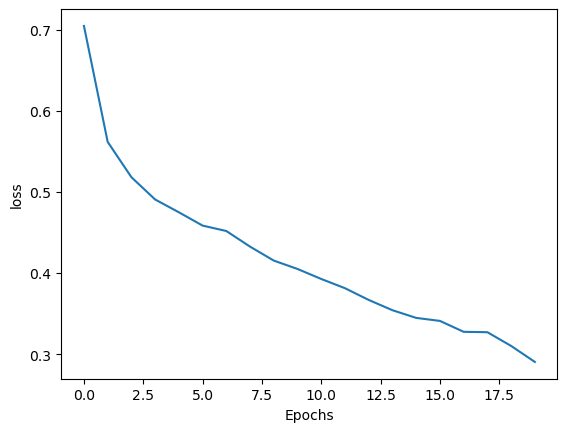

In [42]:
plot_graph_accuracy(neural, 'accuracy')
plot_graph_loss(neural, 'loss')

#### From all models above, we can see that Random Forest seems to be the best one. We will proceed with a hyperparameter tuning for that model.

In [43]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [44]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7303370786516854, 'train Accuracy': 0.995627732667083}


We see that this model looks good but seems to be overfitted. Let´s use hyperparameter tuning to reduce the overfitting

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"],
             'min_samples_split' : [2,5],
             'min_samples_leaf' : [1,2],
             'bootstrap' : [True, False]}

In [46]:
# Below you can see the hyperparameter tuning. I will avoid it here since it takes long time. On chart below you can see the results.

# search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
# search.fit(X_train, y_train)
# print(search.best_score_)
# print(search.best_params_)
# print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

In [47]:
ok_param_grid = {'n_estimators': 31,
             'max_depth' : 17 ,
             'max_features': 'auto',
             'min_samples_split' : 2,
             'min_samples_leaf' : 2,
             'bootstrap' : True}

model = RandomForestClassifier(n_estimators = 31, max_depth=17, min_samples_split = 2, min_samples_leaf = 2,
                               max_features = 'auto', random_state=0)
model.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7106741573033708, 'train Accuracy': 0.7945034353529045}


              precision    recall  f1-score   support

           0       0.76      0.71      0.73       200
           1       0.66      0.71      0.68       156

    accuracy                           0.71       356
   macro avg       0.71      0.71      0.71       356
weighted avg       0.71      0.71      0.71       356



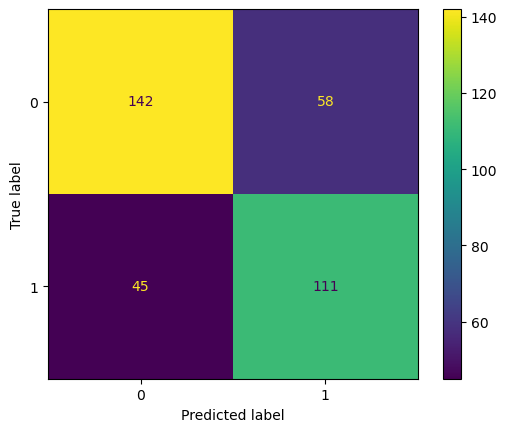

In [51]:
metrics_display(model)

##### We will finally create a pipeline to store the results, so we can use this model on our future predictions.

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop(['Team1_Result', 'opp_code', 'team1_code'],axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),model)
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=17, min_samples_leaf=2,
                                        n_estimators=31, random_state=0))])

In [49]:
pipe_League

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=17, min_samples_leaf=2,
                                        n_estimators=31, random_state=0))])

In [50]:
import joblib
joblib.dump(pipe_League,"groups_stage_prediction.pkl")

['groups_stage_prediction.pkl']